In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import csv
from datetime import datetime

In [41]:
#setting Path to Data file
csvpath = os.path.join('dataset', 'cbp.csv')

df = pd.read_csv(csvpath)
df['Travelers to Booth'] = round(df['Total']/df['Booths'],2)
df.head()

,Airport,Terminal,Date,Hour,US Avg Wait Time,US Max Wait time,nonUS Avg Wait Time,nonUS Max Wait Time,Avg Wait Time,Max Wait Time,...,31-45,46-60,61-90,91-120,120 plus,Excluded,Total,Flights,Booths,Travelers to Booth
0,JFK,Terminal 1,1/1/17,0600 - 0700,13,41,22,41,18,41,...,16,0,0,0,0,4,121,1,4,30.25
1,JFK,Terminal 1,1/1/17,0700 - 0800,17,50,29,53,22,53,...,75,17,0,0,0,14,363,2,7,51.86
2,JFK,Terminal 1,1/1/17,0900 - 1000,13,68,34,78,24,78,...,84,85,44,0,0,29,809,3,16,50.56
3,JFK,Terminal 1,1/1/17,1000 - 1100,15,31,48,106,35,106,...,37,20,49,34,0,14,403,2,18,22.39
4,JFK,Terminal 1,1/1/17,1100 - 1200,9,50,36,78,20,78,...,22,32,74,0,0,26,692,3,15,46.13


In [4]:
#df.rename(columns={'nonUS  Max Wait Time':'nonUS Max Wait Time'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566146 entries, 0 to 566145
Data columns (total 21 columns):
Airport                 566146 non-null object
Terminal                566146 non-null object
Date                    566146 non-null object
Hour                    566146 non-null object
US Avg Wait Time        566146 non-null int64
US Max Wait time        566146 non-null int64
nonUS Avg Wait Time     566146 non-null int64
nonUS  Max Wait Time    566146 non-null int64
Avg Wait Time           566146 non-null int64
Max Wait Time           566146 non-null int64
0-15                    566146 non-null int64
16-30                   566146 non-null int64
31-45                   566146 non-null int64
46-60                   566146 non-null int64
61-90                   566146 non-null int64
91-120                  566146 non-null int64
120 plus                566146 non-null int64
Excluded                566146 non-null int64
Total                   566146 non-null int64
Flights    

In [5]:
#Creating Groupby Date Dataframe
df_booths_gb = df.groupby(['Date'],as_index=False)
df_booths_gb.count().head()

,Date,Airport,Terminal,Hour,US Avg Wait Time,US Max Wait time,nonUS Avg Wait Time,nonUS Max Wait Time,Avg Wait Time,Max Wait Time,...,16-30,31-45,46-60,61-90,91-120,120 plus,Excluded,Total,Flights,Booths
0,1/1/10,178,178,178,178,178,178,178,178,178,...,178,178,178,178,178,178,178,178,178,178
1,1/1/11,188,188,188,188,188,188,188,188,188,...,188,188,188,188,188,188,188,188,188,188
2,1/1/12,185,185,185,185,185,185,185,185,185,...,185,185,185,185,185,185,185,185,185,185
3,1/1/13,187,187,187,187,187,187,187,187,187,...,187,187,187,187,187,187,187,187,187,187
4,1/1/14,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180


In [6]:
#Creating Groupby Date Dataframe continue

#Setting Varibles for new average and aggregated columns

#Determining the Average travelers per hour during a day
#Determining the total travelers for a day
avg_traveler = round(df_booths_gb['Total'].mean())
total_traveler = df_booths_gb['Total'].sum()

#Determining the Average booths per hour during a day
#Determining the total booths for a day
avg_booth = round(df_booths_gb['Booths'].mean(),1)
total_booth = df_booths_gb['Booths'].sum()

#Determining the Average travelers to booths per hour during a day
booths_per_traveler = round(avg_traveler['Total']/avg_booth['Booths'],2)

#Determining the average number of excluded travelers per hour during a day
#Determining the percentage of excluded travelers per hour during a day
avg_excluded_traveler = round(df_booths_gb['Excluded'].mean(),2)
avg_excluded_percent = round(avg_excluded_traveler['Excluded']/avg_traveler['Total']*100,2)

#Determining the total number of excluded travelers during a day
#Determining the percentage of excluded travelers during a day
excluded_traveler = df_booths_gb['Excluded'].sum()
excluded_percent = round(excluded_traveler['Excluded']/total_traveler['Total']*100,2)

#Determining the average wait time for US travelers per hour during a day
#Determining the average Max wait time for US travelers per hour during a day
average_us_wait = round(df_booths_gb['US Avg Wait Time'].mean(),2)
average_max_us_wait = round(df_booths_gb['US Max Wait time'].mean(),2)

#Determining the average wait time for Non-US travelers per hour during a day
#Determining the average Max wait time for Non-US travelers per hour during a day
average_nonus_wait = round(df_booths_gb['nonUS Avg Wait Time'].mean(),2)
average_max_nonus_wait = round(df_booths_gb['nonUS  Max Wait Time'].mean(),2)

#Determining the average wait time for travelers per hour during a day
#Determining the average Max wait time for travelers per hour during a day
average_wait = round(df_booths_gb['Avg Wait Time'].mean(),2)
average_max_wait = round(df_booths_gb['Max Wait Time'].mean(),2)



In [7]:
#Creating Groupby Date Dataframe continue

#Creating DataFrame for aggregated data
df_date_gb = pd.DataFrame({'Date': avg_traveler['Date'],
                          'Total Travelers': total_traveler['Total'],
                          'Average Travelers per Hour': avg_traveler['Total'],
                           'Average Excluded per Hour': avg_excluded_traveler['Excluded'],
                           'Average Excluded %': avg_excluded_percent,
                          'Total Excluded': excluded_traveler['Excluded'],
                          'Excluded %': excluded_percent,
                           'Total Booths': total_booth['Booths'],
                           'Average Booths per Hour': avg_booth['Booths'],
                          'Travelers to Booth per Hour': booths_per_traveler,
                          'Average US Wait Time': average_us_wait['US Avg Wait Time'],
                          'Average Max US Wait Time': average_max_us_wait['US Max Wait time'],
                          'Average Non-US Wait Time': average_nonus_wait['nonUS Avg Wait Time'],
                          'Average Max Non-US Wait Time': average_max_nonus_wait['nonUS  Max Wait Time'],
                          'Average Wait Time': average_wait['Avg Wait Time'],
                          'Average Max Wait Time': average_max_wait['Max Wait Time']
                         })

#Reordering DataFrame's columns
df_date_gb = df_date_gb[['Date',
                         'Total Travelers',
                         'Average Travelers per Hour',
                         'Average Excluded per Hour',
                         'Average Excluded %',
                         'Total Excluded',
                         'Excluded %',
                         'Average US Wait Time',
                         'Average Max US Wait Time',
                         'Average Non-US Wait Time',
                         'Average Max Non-US Wait Time',
                         'Average Wait Time',
                         'Average Max Wait Time',
                         'Average Booths per Hour',
                         'Total Booths',
                         'Travelers to Booth per Hour']]
#df_booths.reset_index()
df_date_gb['Date'] = pd.to_datetime(df_date_gb['Date'])
df_date_gb = df_date_gb.sort_values(['Date'],ascending=True)
df_date_gb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2887 entries, 0 to 687
Data columns (total 16 columns):
Date                            2887 non-null datetime64[ns]
Total Travelers                 2887 non-null int64
Average Travelers per Hour      2887 non-null float64
Average Excluded per Hour       2887 non-null float64
Average Excluded %              2887 non-null float64
Total Excluded                  2887 non-null int64
Excluded %                      2887 non-null float64
Average US Wait Time            2887 non-null float64
Average Max US Wait Time        2887 non-null float64
Average Non-US Wait Time        2887 non-null float64
Average Max Non-US Wait Time    2887 non-null float64
Average Wait Time               2887 non-null float64
Average Max Wait Time           2887 non-null float64
Average Booths per Hour         2887 non-null float64
Total Booths                    2887 non-null int64
Travelers to Booth per Hour     2887 non-null float64
dtypes: datetime64[ns](1), fl

In [8]:
df_date_gb.head()

,Date,Total Travelers,Average Travelers per Hour,Average Excluded per Hour,Average Excluded %,Total Excluded,Excluded %,Average US Wait Time,Average Max US Wait Time,Average Non-US Wait Time,Average Max Non-US Wait Time,Average Wait Time,Average Max Wait Time,Average Booths per Hour,Total Booths,Travelers to Booth per Hour
0,2010-01-01,101751,572.0,19.75,3.45,3515,3.45,0.0,0.0,0.0,0.0,16.13,40.71,20.8,3697,27.50
88,2010-01-02,117388,608.0,21.12,3.47,4076,3.47,0.0,0.0,0.0,0.0,15.63,37.57,20.2,3890,30.10
176,2010-01-03,116236,575.0,19.85,3.45,4009,3.45,0.0,0.0,0.0,0.0,15.32,36.44,21.1,4269,27.25
200,2010-01-04,110783,557.0,20.18,3.62,4016,3.63,0.0,0.0,0.0,0.0,16.82,40.40,20.2,4025,27.57
208,2010-01-05,103682,540.0,19.15,3.55,3676,3.55,0.0,0.0,0.0,0.0,19.44,46.34,20.3,3900,26.60


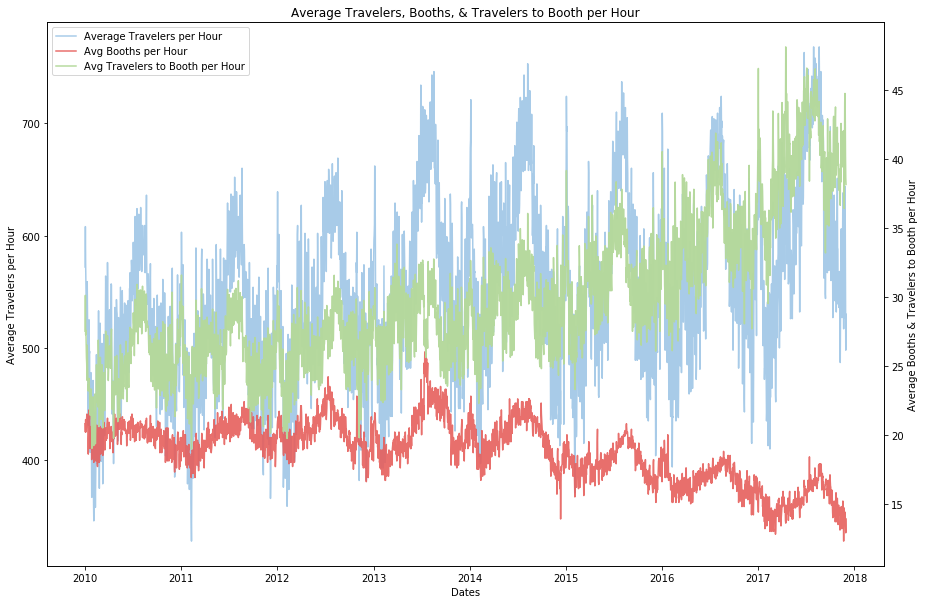

In [9]:
#Creating Overall Travelers to booth chart
x = df_date_gb['Date']
y1 = df_date_gb['Average Travelers per Hour']
y2 = df_date_gb['Average Booths per Hour']
y2a = df_date_gb['Travelers to Booth per Hour']


fig, ax1 = plt.subplots(figsize=(15,10))
#fig = plt.figure(figsize=(20, 5), dpi=100)

ax2 = ax1.twinx()
travelers_per_hour, = ax1.plot(x, y1, color='#5299D3', alpha=0.5)
avg_booths, = ax2.plot(x, y2, color='#E65F5C',label='Avg Booths per Hour', alpha=0.9)
avg_travelers_to_booth, = ax2.plot(x, y2a, color='#B5D99C',label='Avg Travelers to Booth per Hour', alpha=0.98)

ax1.set_xlabel('Dates')
ax1.set_ylabel('Average Travelers per Hour')
ax2.set_ylabel('Average Booths & Travelers to Booth per Hour')

plt.legend(handles=[travelers_per_hour,avg_booths,avg_travelers_to_booth],loc='upper left')
#fig.tight_layout()
#plt.Figure(figsize=(20,10),dpi=100)
plt.title("Average Travelers, Booths, & Travelers to Booth per Hour")
plt.savefig("charts/travelers_booths.png")
plt.show()

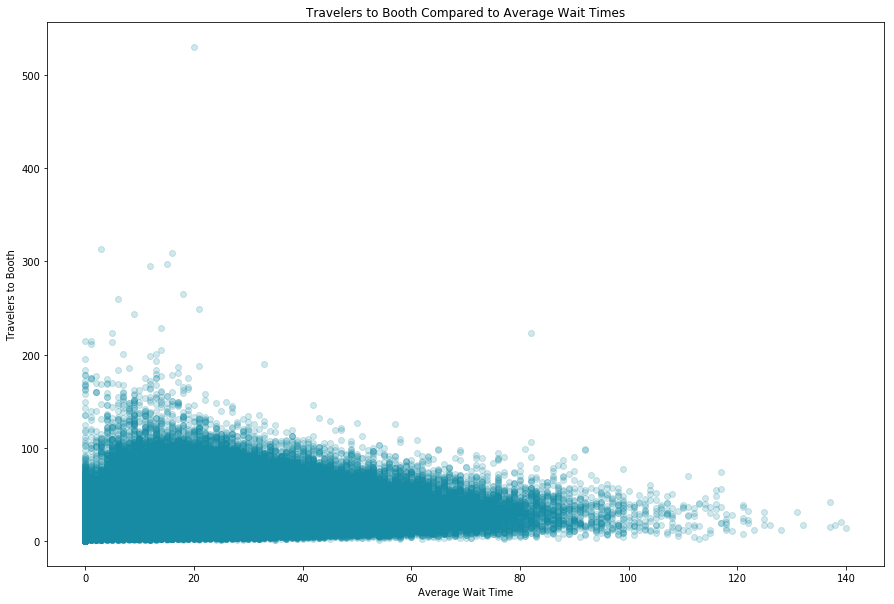

In [47]:
#plotting average wait times compared to travelers to booth
fig = plt.figure(figsize=(15, 10))
plt.scatter(df['Avg Wait Time'],df['Travelers to Booth'],color="#168BA3",alpha=.2)
plt.title("Travelers to Booth Compared to Average Wait Times")
plt.xlabel("Average Wait Time")
plt.ylabel("Travelers to Booth")
plt.savefig("charts/travelers_booths_scatter.png")
plt.show()

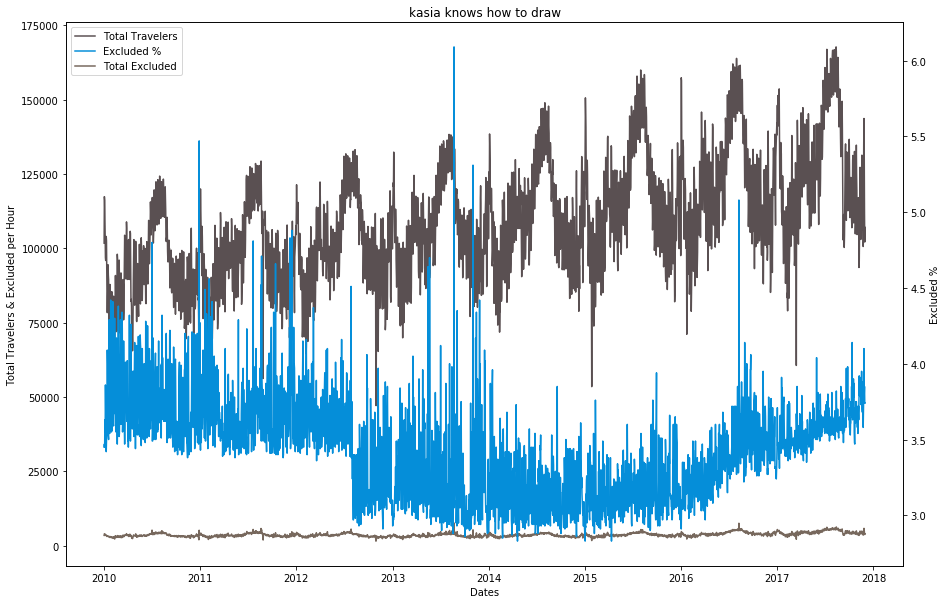

In [19]:
#Creating excluded chart
x = df_date_gb['Date']
y1 = df_date_gb['Total Travelers']
y2 = df_date_gb['Excluded %']
y1a = df_date_gb['Total Excluded']


fig, ax1 = plt.subplots(figsize=(15,10))
#fig = plt.figure(figsize=(20, 5), dpi=100)

ax2 = ax1.twinx()
travelers_per_hour, = ax1.plot(x, y1, color='#483D3F', alpha=0.9, label='Total Travelers')
avg_excluded_percent, = ax2.plot(x, y2, color='#058ED9',label='Excluded %')
avg_excluded, = ax1.plot(x, y1a, color='#77685D',label='Total Excluded')

ax1.set_xlabel('Dates')
ax1.set_ylabel('Total Travelers & Excluded per Hour')
ax2.set_ylabel('Excluded %')

plt.legend(handles=[travelers_per_hour,avg_excluded_percent,avg_excluded],loc='upper left')
#fig.tight_layout()
#plt.Figure(figsize=(20,10),dpi=100)
plt.title("Total Travelers, Total Excluded, & Excluded %")
plt.savefig("charts/travelers_Excluded.png")
plt.show()

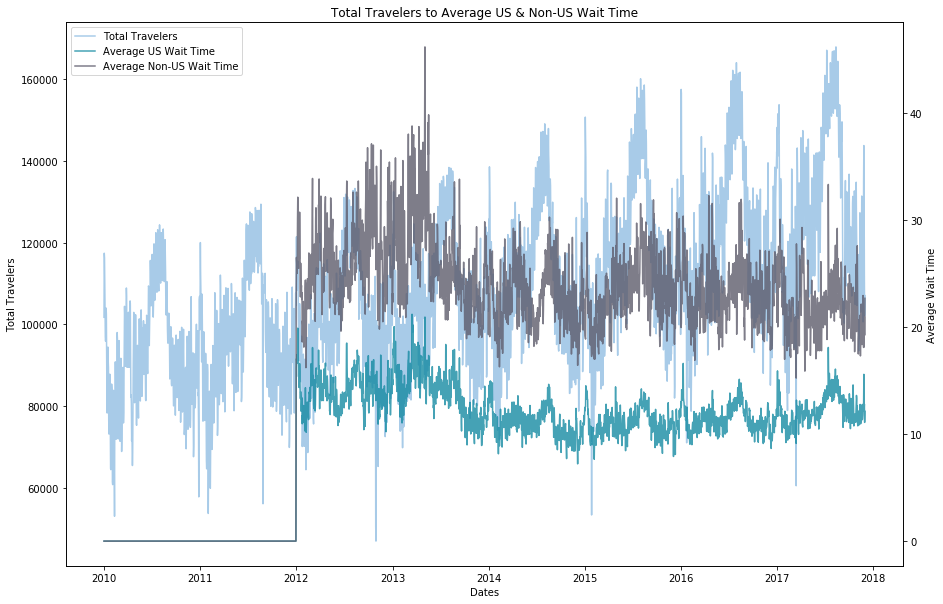

In [11]:
#Creating average wait time chart
x = df_date_gb['Date']
y1 = df_date_gb['Total Travelers']
y2 = df_date_gb['Average US Wait Time']
y2a = df_date_gb['Average Non-US Wait Time']


fig, ax1 = plt.subplots(figsize=(15,10))
#fig = plt.figure(figsize=(20, 5), dpi=100)

ax2 = ax1.twinx()
travelers_per_hour, = ax1.plot(x, y1, color='#5299D3', alpha=0.5, label='Total Travelers')
avg_us_wait_time, = ax2.plot(x, y2, color='#168BA3',alpha=0.8,label='Average US Wait Time')
avg_non_us_wait_time, = ax2.plot(x, y2a, color='#5E5C6C',alpha=0.8,label='Average Non-US Wait Time')

ax1.set_xlabel('Dates')
ax1.set_ylabel('Total Travelers')
ax2.set_ylabel('Average Wait Time')

plt.legend(handles=[travelers_per_hour,avg_us_wait_time,avg_non_us_wait_time],loc='upper left')
#fig.tight_layout()
#plt.Figure(figsize=(20,10),dpi=100)
plt.title("Total Travelers to Average US & Non-US Wait Time")
plt.savefig("charts/travelers_wait_time.png")
plt.show()

In [12]:
#creating By Hour Groupby
df_hour_gb = df.groupby(['Hour'],as_index=False)
df_hour_gb = round(df_hour_gb[['Hour',
            'Total',
            'Excluded',
            'Booths',
            'US Avg Wait Time',
            'US Max Wait time',
            'nonUS Avg Wait Time',
           'nonUS  Max Wait Time',
           'Avg Wait Time',
           'Max Wait Time'
           ]].mean(),2)
df_hour_gb = df_hour_gb.rename(columns={'Total':'Avg Travelers'})

df_hour_gb['Hours'] = df_hour_gb['Hour'].str.split(' ').str[0].str[0:2]

#df_hour_gb['Hours'] = pd.to_datetime(df_hour_gb['Hours'])
df_hour_gb['Hours'] = pd.to_datetime(df_hour_gb['Hours'], format='%H').dt.hour
df_hour_gb.head()

,Hour,Avg Travelers,Excluded,Booths,US Avg Wait Time,US Max Wait time,nonUS Avg Wait Time,nonUS Max Wait Time,Avg Wait Time,Max Wait Time,Hours
0,0000 - 0100,279.61,13.22,11.88,9.44,26.10,16.31,31.04,19.29,43.00,0
1,0100 - 0200,195.11,17.96,10.03,7.99,23.78,15.77,30.65,16.96,37.69,1
2,0200 - 0300,178.42,6.17,9.55,9.35,27.72,18.64,35.08,19.12,41.64,2
3,0300 - 0400,230.29,7.61,15.17,11.27,29.42,20.95,39.16,22.95,48.03,3
4,0400 - 0500,607.30,19.57,19.47,10.27,34.67,20.98,42.54,22.66,54.86,4


In [13]:
df_hour_gb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 11 columns):
Hour                    24 non-null object
Avg Travelers           24 non-null float64
Excluded                24 non-null float64
Booths                  24 non-null float64
US Avg Wait Time        24 non-null float64
US Max Wait time        24 non-null float64
nonUS Avg Wait Time     24 non-null float64
nonUS  Max Wait Time    24 non-null float64
Avg Wait Time           24 non-null float64
Max Wait Time           24 non-null float64
Hours                   24 non-null int64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.2+ KB


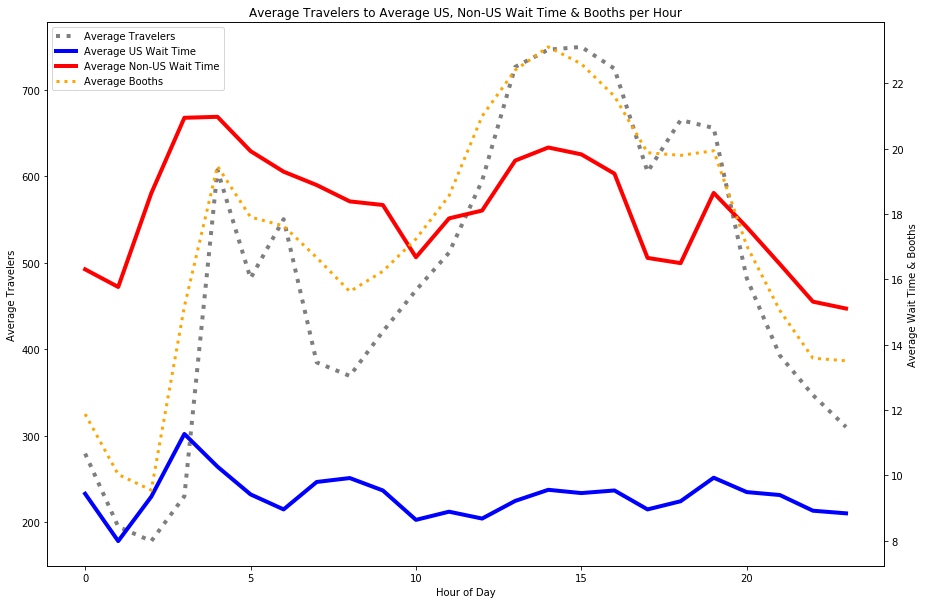

In [14]:
#Creating average wait time & booths chart
x = df_hour_gb['Hours']
y1 = df_hour_gb['Avg Travelers']
y2 = df_hour_gb['US Avg Wait Time']
y2a = df_hour_gb['nonUS Avg Wait Time']
y2b = df_hour_gb['Booths']


fig, ax1 = plt.subplots(figsize=(15,10))
#fig = plt.figure(figsize=(20, 5), dpi=100)

ax2 = ax1.twinx()
travelers_per_hour, = ax1.plot(x, y1, color='black', alpha=0.5, label='Average Travelers',linestyle=":",linewidth=4)
avg_us_wait_time, = ax2.plot(x, y2, 'b-',label='Average US Wait Time',linewidth=4)
avg_non_us_wait_time, = ax2.plot(x, y2a, 'r-',label='Average Non-US Wait Time',linewidth=4)
avg_booths, = ax2.plot(x, y2b, color='orange',label='Average Booths',linestyle=":",linewidth=3)

ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Travelers')
ax2.set_ylabel('Average Wait Time & Booths')

plt.legend(handles=[travelers_per_hour,avg_us_wait_time,avg_non_us_wait_time,avg_booths],loc='upper left')
#fig.tight_layout()
#plt.Figure(figsize=(20,10),dpi=100)
plt.title("Average Travelers to Average US, Non-US Wait Time & Booths per Hour")
plt.savefig("charts/travelers_hourly_wait_booth.png")
plt.show()

In [15]:
#creating By airport Groupby DataFrame
df_airport_gb = df.groupby(['Airport'],as_index=False)
df_airport = round(df_airport_gb[[
            'Total',
            'Booths',
            'US Avg Wait Time',
            'nonUS Avg Wait Time'
           ]].mean(),2)
df_airport = df_airport.rename(columns={'Total':'Avg Travelers'})


df_airport.head()

,Airport,Avg Travelers,Booths,US Avg Wait Time,nonUS Avg Wait Time
0,DFW,547.72,14.15,7.93,15.62
1,EWR,489.27,16.10,8.76,14.97
2,JFK,516.05,18.23,10.22,20.46
3,LAX,566.29,20.79,9.05,16.14
4,MIA,657.13,21.02,8.87,19.57


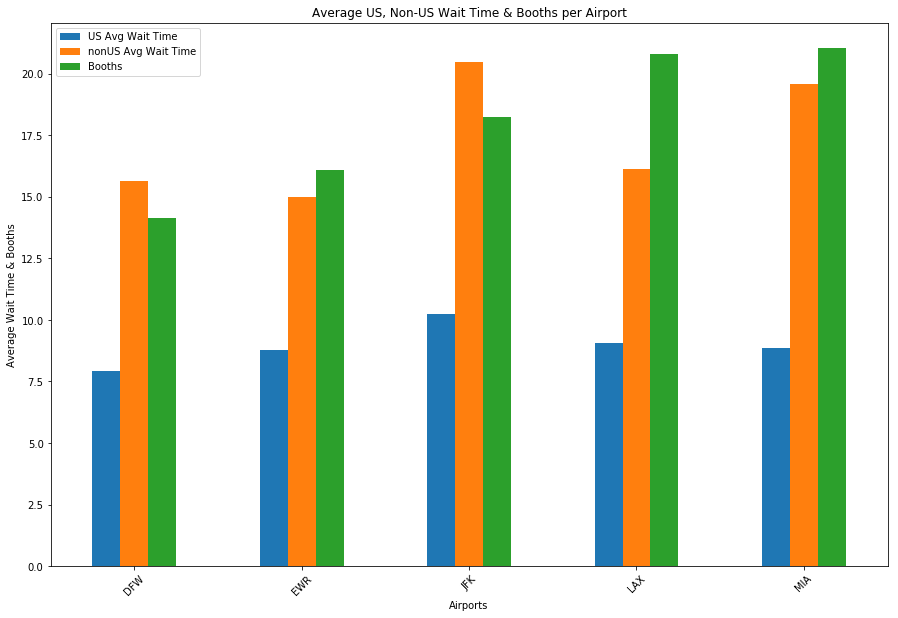

In [16]:
#Creating average wait time & booths per airport chart
x = df_airport['Airport']
y2 = df_airport['Avg Travelers']
y1 = df_airport['US Avg Wait Time']
y1a = df_airport['nonUS Avg Wait Time']
y1b = df_airport['Booths']



multi_plot = df_airport[['US Avg Wait Time','nonUS Avg Wait Time','Booths']].plot(kind="bar", figsize=(15,10))
multi_plot.set_xticklabels(df_airport['Airport'], rotation=45)

multi_plot.set_xlabel('Airports')
multi_plot.set_ylabel('Average Wait Time & Booths')


plt.title("Average US, Non-US Wait Time & Booths per Airport")
plt.savefig("charts/travelers_wait_booth_airport.png")
plt.show()

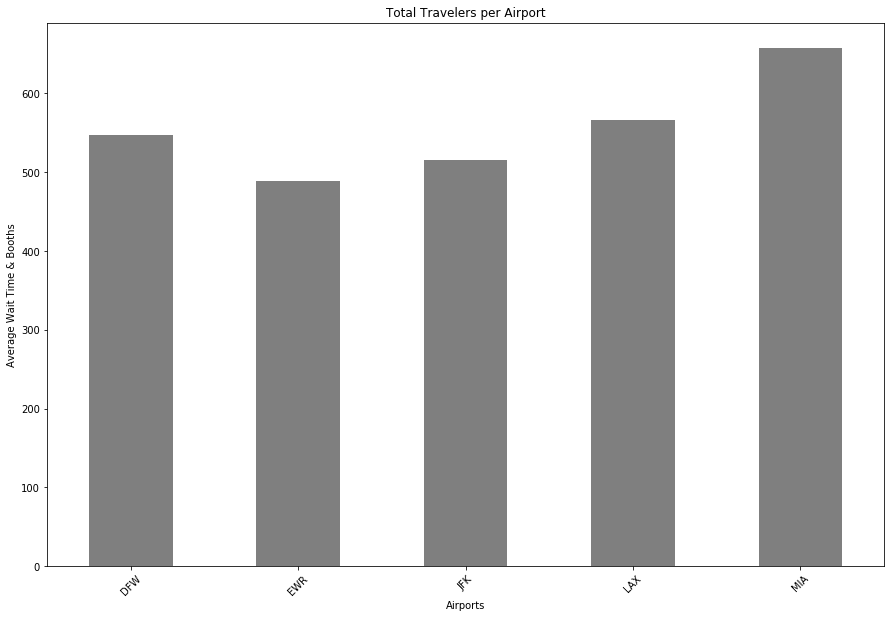

In [17]:
#Creating total travelers per airport chart
x = df_airport['Airport']
y2 = df_airport['Avg Travelers']
y1 = df_airport['US Avg Wait Time']
y1a = df_airport['nonUS Avg Wait Time']
y1b = df_airport['Booths']

multi_plot = df_airport['Avg Travelers'].plot(kind="bar", figsize=(15,10),color='black', alpha=0.5)


multi_plot.set_xticklabels(df_airport['Airport'], rotation=45)

multi_plot.set_xlabel('Airports')
multi_plot.set_ylabel('Average Wait Time & Booths')


plt.title("Total Travelers per Airport")
plt.savefig("charts/travelers_airport.png")
plt.show()